In [20]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from sklearn.model_selection import train_test_split

for dirname, _, filenames in os.walk('C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\heart.csv
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\Heart_Disease_Predictor.ipynb
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\Homework3.ipynb
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\housing.csv
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\IRIS.csv
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\jwtExperiements.py
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\nodesDifference.png
C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\test.ipynb


### Visualizing and Exploring the data

In [21]:
heart = pd.read_csv("C:/Users/Shatha Barqawi/Documents/Fourth Year Second Semster/AI/MyPythonExperiments\heart.csv")
heart.head()

# The data is as follows:

# 1.    age (age in years)
# 2.	sex (1:Male, 0:Female)
# 3.	chest pain type (4 values) aka cp
# 4.	resting blood pressure (in mm Hg on admission to the hospital) aka trestbps
# 5.	serum cholesterol (in mg/dl) aka chol
# 6.	fasting blood sugar > 120 mg/dl aka fbs
# 7.	resting electrocardiographic results (values 0,1,2)
# 8.	maximum heart rate achieved
# 9.	exercise induced angina
# 10.	old peak = ST depression induced by exercise relative to rest
# 11.	the slope of the peak exercise ST segment
# 12.	number of major vessels (0-3) colored by fluoroscopy
# 13.	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
# 14.	target


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
heart.isnull().sum()
#Checking if any of the data we aquired is null or not

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Checking the number of entries

In [23]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


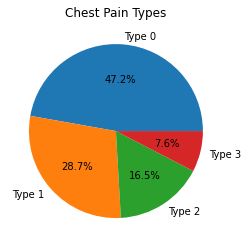

In [24]:
heart['cp'].value_counts()

# The result of the above line:

# 0    143
# 2     87
# 1     50
# 3     23
# Name: cp, dtype: int64

labels = ["Type 0","Type 1","Type 2","Type 3"]
cp_types = heart['cp'].value_counts().values
plt.pie(cp_types,autopct="%.1f%%", labels = labels)
plt.title("Chest Pain Types")
plt.show()

#As we can notice from the data chest pain type zero is the most common in our data

<AxesSubplot:xlabel='sex', ylabel='count'>

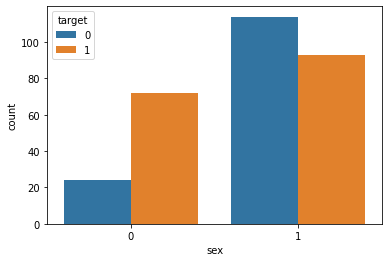

In [25]:
sns.countplot(x='sex',hue='target',data=heart)
# As we can see in the plot the number of males who had heart disease is much greater than the number of females

### Is Data Balanced?
Checking if the number of people with heart disease is balanced with number of people that don't


<AxesSubplot:xlabel='target', ylabel='count'>

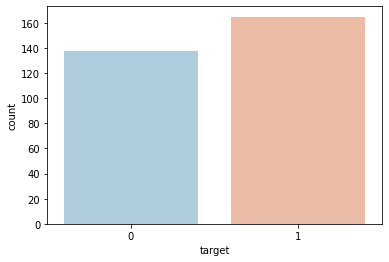

In [26]:
sns.countplot(x='target',data=heart, palette='RdBu_r')

#As we can see in the countplot the data is quite balanced

### correlation matrix & Heatmap

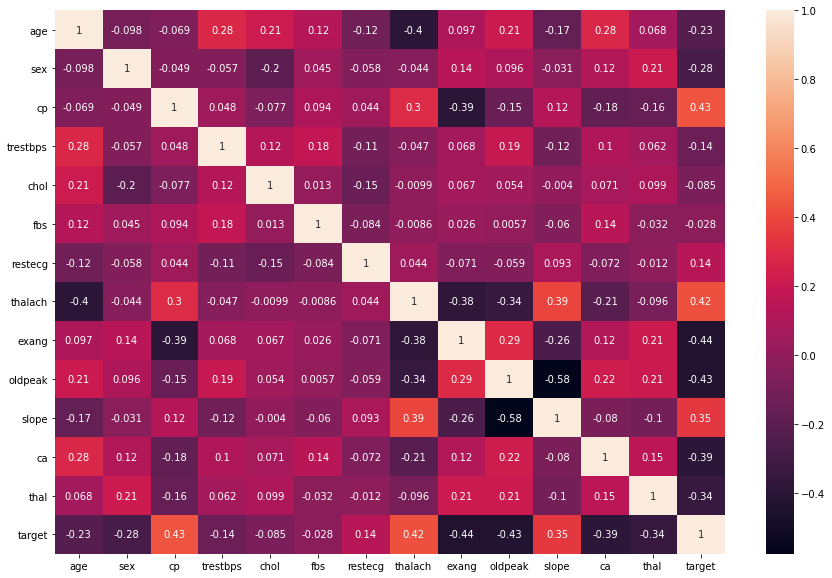

In [27]:
corr_matrix = heart.corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True)

There are some categorical data and it's best if we create dummy variables for them

In [28]:
new_heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Then we will standardize the numerical data that we have so that we get better results

In [29]:
from sklearn import preprocessing
standardScaler = preprocessing.StandardScaler()
tobe_scaled = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_heart[tobe_scaled] = standardScaler.fit_transform(new_heart[tobe_scaled])
new_heart

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


### Splitting the Data for Training & Testing

--> training set which will contain 80% of the data set : 242
--> test set which will contain 20% of the data set : 61
Of course after we drop the target and put it in a separate df
random_state=42 --> to not produce the same results across a different run.


In [30]:
# then we Split the data set into :

#Deleting the slope because it's value is above 0.5 which we can consider a 
#threshold to see how much the data is correlated

# new_heart.drop('slope',axis=1,inplace=True)

X = new_heart.drop('target',axis=1)
Y = new_heart['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
132,-1.363869,-0.663867,0.941846,0.540209,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
202,0.400752,1.049520,0.458709,-1.690047,-0.206705,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
196,-0.922713,1.049520,-0.294985,-0.115749,2.208842,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
75,0.069886,0.192827,0.072199,0.496478,0.310912,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
176,0.621330,-0.835206,-0.314310,0.452748,0.310912,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.481558,0.478391,-0.256334,0.583939,-0.379244,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
71,-0.371269,-2.148802,-0.372287,0.190365,-0.896862,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
106,1.613930,1.620649,-0.237008,-0.815437,-0.810592,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
270,-0.922713,-0.663867,0.052874,-0.246940,-0.206705,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1


Then we start with the first algorithm we want to use which is LogisticRegression
And we chose this one specifically because our data gives a binary result either 
 0 or 1 (heart disease or no heart disease)

In [31]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

### Prediction for the test set

In [35]:
from sklearn import preprocessing
standardScaler = preprocessing.StandardScaler()
tobe_scaled = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_heart[tobe_scaled] = standardScaler.fit_transform(new_heart[tobe_scaled])

predictions=logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

[[26  3]
 [ 4 28]]


In [37]:
accuracy_score(Y_test,predictions)

0.8852459016393442

In [1]:
yyy = 10
xxxx = (yyy)
print(xxxx)

10
